# Linear Classification

In [64]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [92]:
n_samples = 10000
n_features = 2
n_classes = 3
test_size = 0.3

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features,
                           n_classes=n_classes,
                           n_redundant=0, 
                           n_repeated=0, 
                           n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

data = pd.DataFrame.from_dict({
    'x1': X_train[:, 0],
    'x2': X_train[:, 1],
    'label': y_train
})

# 1-K encoding of the label
one_hot_encoder = LabelBinarizer()
one_hot_encoder.fit(y_train)
y_train_bin = one_hot_encoder.transform(y_train)

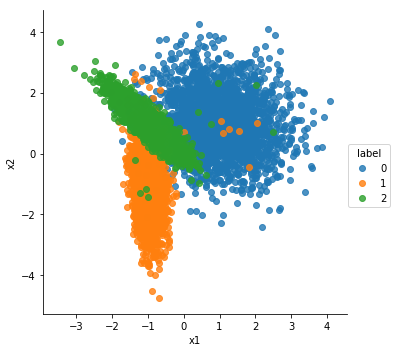

In [93]:
sns.lmplot(x="x1", y="x2", hue="label", data=data, fit_reg=False)

## Least squares for linear classification
Each class $C_k$ have its own linear model
$$
    y_k(\mathbf{x}) = \mathbf{w}_k^T\mathbf{x} + w_{k0}, \qquad k = 1, ..., K
$$
or, grouping all the classes together
$$
    \mathbf{y}(\mathbf{x}) = \mathbf{\tilde{W}}^T\mathbf{\tilde x}
$$

$$
    \mathbf{\tilde{W}} = \left[ 
    \begin{array}{ccc}
    ... & w_{k0} & ...\\
    ... & \mathbf{w}_k^T & ...
    \end{array}
    \right], \qquad
    \mathbf{\tilde x} = \left[ 
    \begin{array}{c}
    1\\
    \mathbf{x}^T
    \end{array}
    \right]
$$

A new input x is then assigned to the class for which the output $y_k = \mathbf{\tilde{w}}^T_k\mathbf{\tilde x}$ is largest.

The parameter matrix is found by minimizing the sum-of-squares error function:
$$
    E_{D}\left( \mathbf{\tilde{W}} \right) = \frac{1}{2} \text{Tr}\left\{ \left( \mathbf{\tilde{X}}\mathbf{\tilde{W}} - \mathbf{T} \right)^T\left( \mathbf{\tilde{X}}\mathbf{\tilde{W}} - \mathbf{T} \right) \right\}
$$

where $\mathbf{T} = \left[ 
    \begin{array}{c}
    \vdots \\
    \mathbf{t}_n^T\\
    \vdots
    \end{array}
    \right]$

Setting the derivative to zero we obtain:

$$
    \mathbf{\tilde{W}} = \left( \mathbf{\tilde{X}}^T\mathbf{\tilde{X}} \right)^{-1}\mathbf{\tilde{X}}^T\mathbf{T}
$$

In [94]:
X_tilde = np.append(np.ones(X_train.shape[0]).reshape((-1, 1)), X_train, axis=1)
T = y_train_bin

In [95]:
W_tilde = np.linalg.inv(X_tilde.T.dot(X_tilde)).dot(X_tilde.T.dot(T))

In [96]:
X_test_tilde = np.append(np.ones(X_test.shape[0]).reshape((-1, 1)), X_test, axis=1)

In [97]:
y_pred = X_test_tilde.dot(W_tilde)
y_pred = np.argmax(y_pred, axis=1)

In [98]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.91      0.87      0.89       962
          1       0.87      0.89      0.88      1007
          2       0.82      0.84      0.83      1031

avg / total       0.87      0.87      0.87      3000



The decision boundary is given by the equation:

$$
0 = w_0 + aw_1 + bw_2
$$
In order to plot it we just compute $w_2$ as a function of $w_1$
$$
b = -\frac{w_0}{w_2} - a\frac{w_1}{w_2}
$$

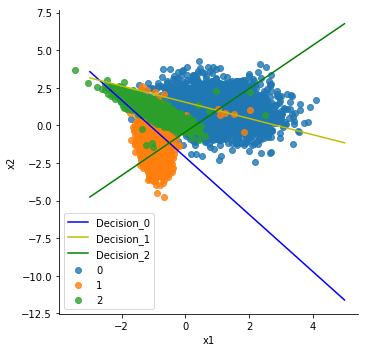

In [99]:
sns.lmplot(x="x1", y="x2", hue="label", data=data, fit_reg=False, legend=False)

a = -(W_tilde[:, 1] / W_tilde[:, 2])
xx = np.linspace(-3, 5)
yy = np.multiply(a.reshape((-1, 1)), xx) - (np.repeat(W_tilde[:, 0] / W_tilde[:, 2], xx.shape, axis=0).reshape((-1, xx.shape[0])))

plt.plot(xx, yy[0, :], 'b-', label="Decision_0")
plt.plot(xx, yy[1, :], 'y-', label="Decision_1")
plt.plot(xx, yy[2, :], 'g-', label="Decision_2")
plt.legend()